In [ ]:
Dataset Problem Statement

Does the number of years employed have any direct correlation to the overall number of employees 
retained vs left. Is there a point in which x-amount years employeed has a significant shift of 
employees leaving the company vs retained. Our analysis will consists upon the bases of two clear 
distinctions, where years employeed (>=5 and <=5). The purpose of this project is to determine if 
there are any correlations with hours worked, projects completed, and satisfaction levels amongst 
employees. Once our analysis is complete, we will take another step by seperating our analysis into 
departments in order to create insights to see if there are any correlations amongst departments 



In [ ]:
Importing Necessary Tools

In [30]:
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import pandas as pd 
import statsmodels.api as sm 
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (16,3) 

In [ ]:
Data Cleansing

In [31]:
df = pd.read_csv('HR_capstone_dataset.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
df = df.rename(columns={'average_montly_hours' : 'average_monthly_hours', 'Work_accident' : 'work_accident', 'Department' : 'department'})
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [35]:
# check for null values
df.isnull().sum().reset_index()

,index,0
0,satisfaction_level,0
1,last_evaluation,0
2,number_project,0
3,average_monthly_hours,0
4,time_spend_company,0
5,work_accident,0
6,left,0
7,promotion_last_5years,0
8,department,0
9,salary,0


In [43]:
# 0 = retained : 11428
# 1 = left : 3571

left_vs_retained_df = df['left']
left_vs_retained_df.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
Part 1 - Create summary statistics for each variable / Basic Overview Of Dataset with Box/Line Plot
Part 2 - Visualize the left vs retained results based on >=5 and <=5 years employed
Part 3 - Visualize the correlations with variables ['satisfaction_levels', 'number_project, 
                                                    'average_monthly_hours']
Part 4 - Visualize the correlations with same variables grouped by ['Department'] 

In [ ]:
Part 1 - Create summary statistics for each variable needed 

<Axes: >

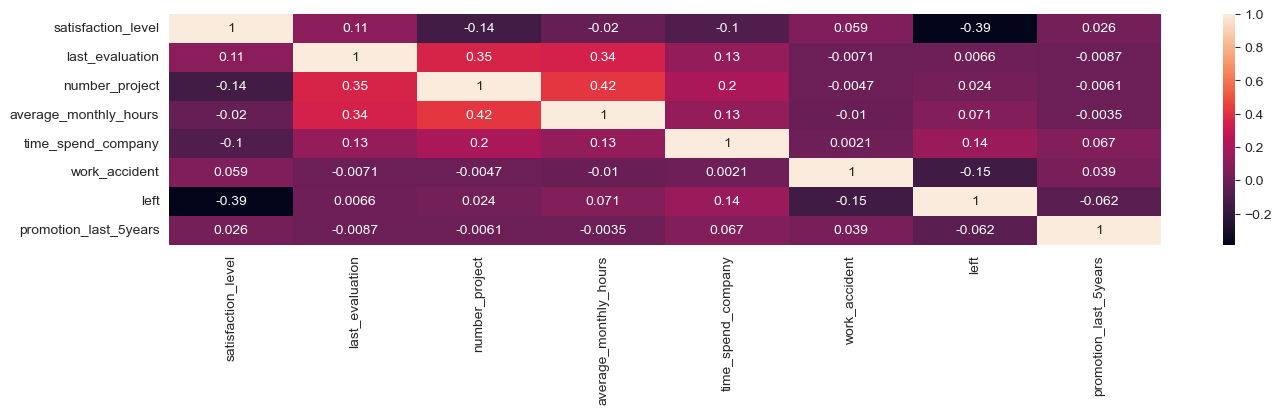

In [36]:
# brief overview of potential correlations
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)

In [142]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [143]:
df['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [147]:
df['time_spend_company'].value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

In [24]:
df['time_spend_company'].value_counts(normalize=True)

time_spend_company
3     0.429562
2     0.216281
4     0.170478
5     0.098207
6     0.047870
10    0.014268
7     0.012534
8     0.010801
Name: proportion, dtype: float64

In [144]:
df['satisfaction_level'].value_counts()

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: count, Length: 92, dtype: int64

In [23]:
df['satisfaction_level'].value_counts(normalize=True)

satisfaction_level
0.10    0.023868
0.11    0.022335
0.74    0.017134
0.77    0.016801
0.84    0.016468
          ...   
0.25    0.002267
0.28    0.002067
0.27    0.002000
0.26    0.002000
0.12    0.002000
Name: proportion, Length: 92, dtype: float64

In [145]:
df['number_project'].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

In [106]:
df['number_project'].value_counts(normalize=True)

number_project
4    0.291019
3    0.270351
5    0.184079
2    0.159211
6    0.078272
7    0.017068
Name: proportion, dtype: float64

In [146]:
df['average_monthly_hours'].value_counts()

average_monthly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64

In [26]:
df['average_monthly_hours'].value_counts(normalize=True)

average_monthly_hours
135    0.010201
156    0.010201
149    0.009867
151    0.009801
160    0.009067
         ...   
297    0.000467
288    0.000400
299    0.000400
96     0.000400
303    0.000400
Name: proportion, Length: 215, dtype: float64

In [152]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [153]:
df['department'].value_counts(normalize=True)

department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64

In [37]:
# update dataframe with only columns needed for analysis
updated_df = df.drop(columns=['last_evaluation', 'work_accident', 'promotion_last_5years', 'salary'])
updated_df.head()

,satisfaction_level,number_project,average_monthly_hours,time_spend_company,left,department
0,0.38,2,157,3,1,sales
1,0.80,5,262,6,1,sales
2,0.11,7,272,4,1,sales
3,0.72,5,223,5,1,sales
4,0.37,2,159,3,1,sales


Text(0.5, 1.0, 'HR Dataset')

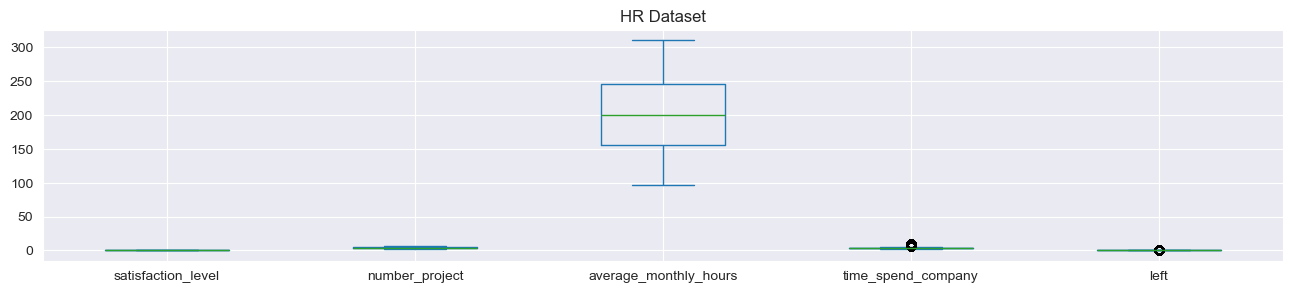

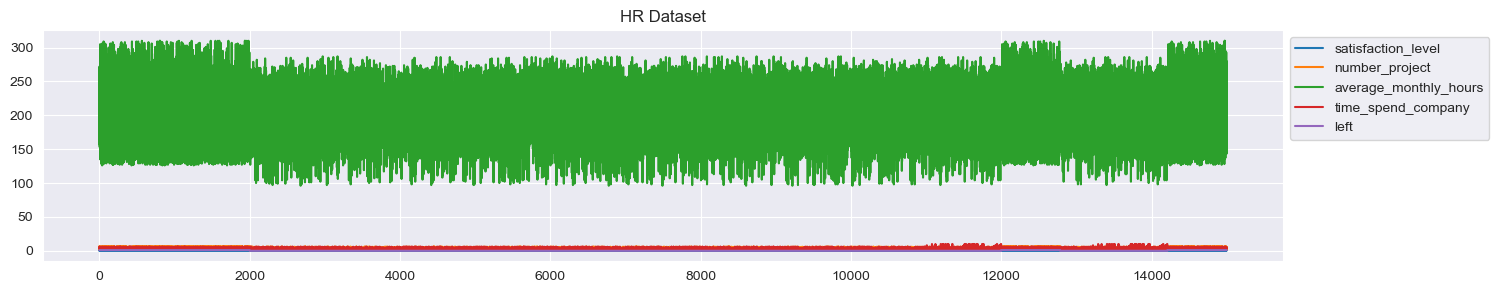

In [38]:
# Overview of entire dataset for potential outliers
updated_df.plot(kind='box')
plt.title("HR Dataset")
updated_df.plot(kind='line')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('HR Dataset')

In [ ]:
Next step: Filter into 4 sections to check outliers of needed columns for thorough analysis

<Axes: >

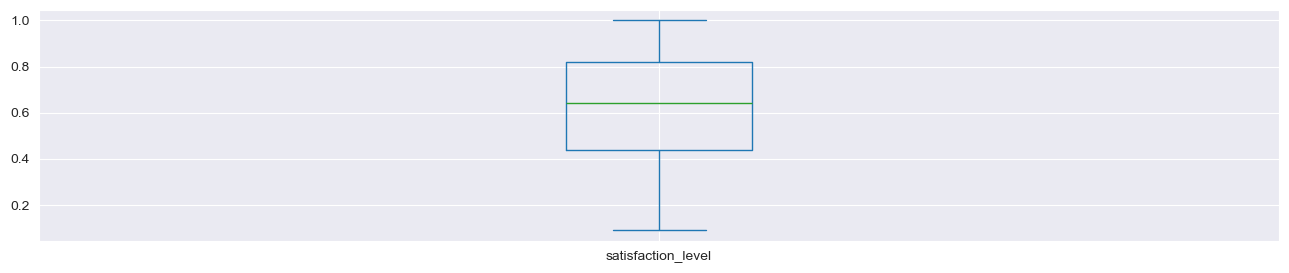

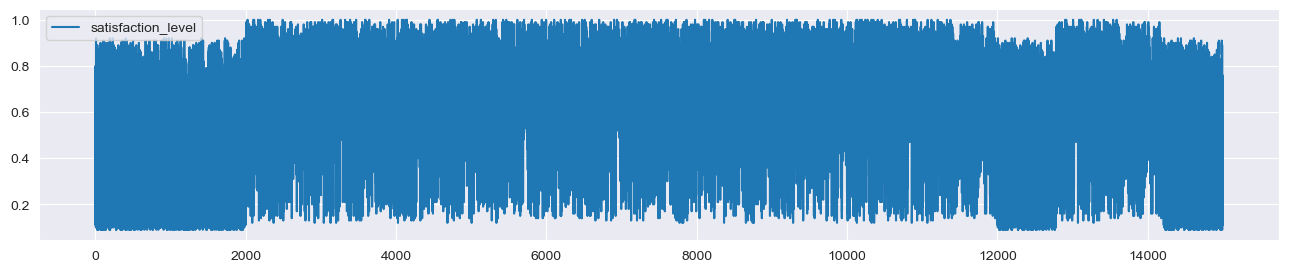

In [81]:
# filtered to only show ['satisfaction_level'] for clearer visual
satisfaction_df = updated_df.drop(columns=(['number_project','average_monthly_hours',
                                            'time_spend_company', 'left']))
satisfaction_df.plot(kind='box')

satisfaction_df.plot(kind='line')

<Axes: >

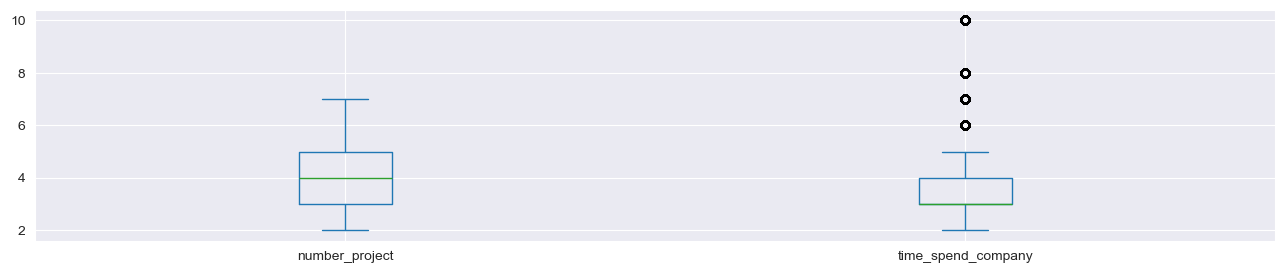

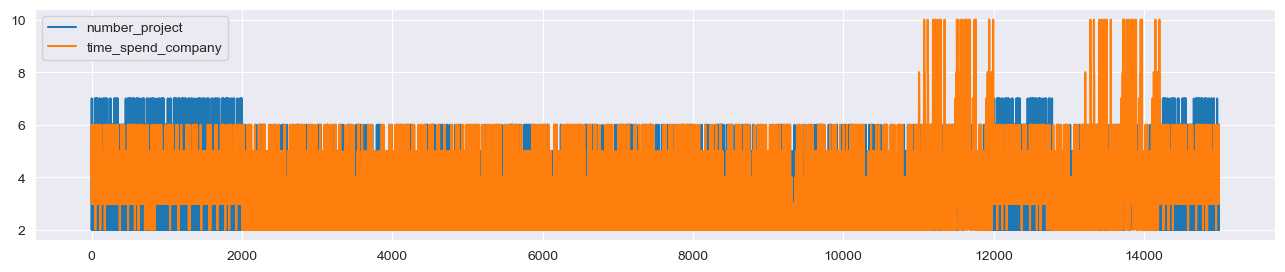

In [82]:
# filtered to only show [['number_projects', 'time_spend_company']] for clearer visual
projects_time_df = updated_df.drop(columns=(['satisfaction_level', 
                                             'average_monthly_hours', 'left']))
projects_time_df.plot(kind='box')

projects_time_df.plot(kind='line')

<Axes: >

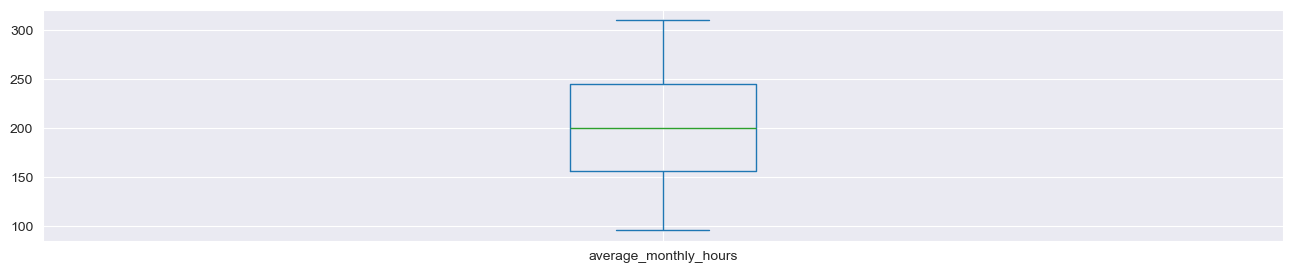

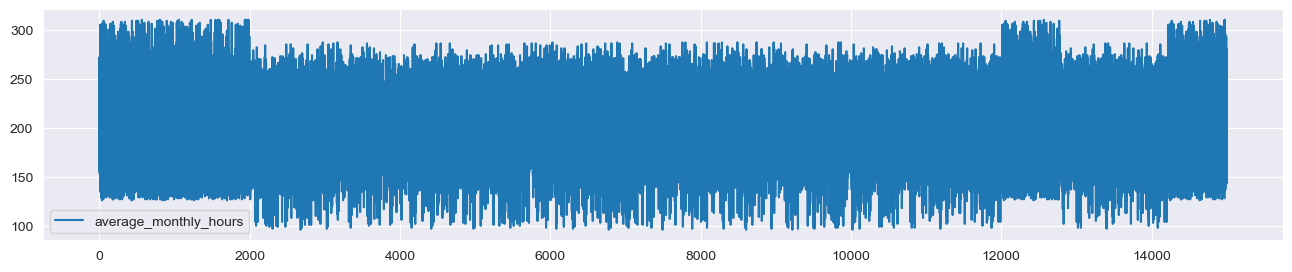

In [83]:
# filtered to only show ['average_monthly_hours'] for clearer visual
hours_df = updated_df.drop(columns=(['satisfaction_level', 'number_project', 
                                     'time_spend_company', 'left']))
hours_df.plot(kind='box')

hours_df.plot(kind='line')

<Axes: >

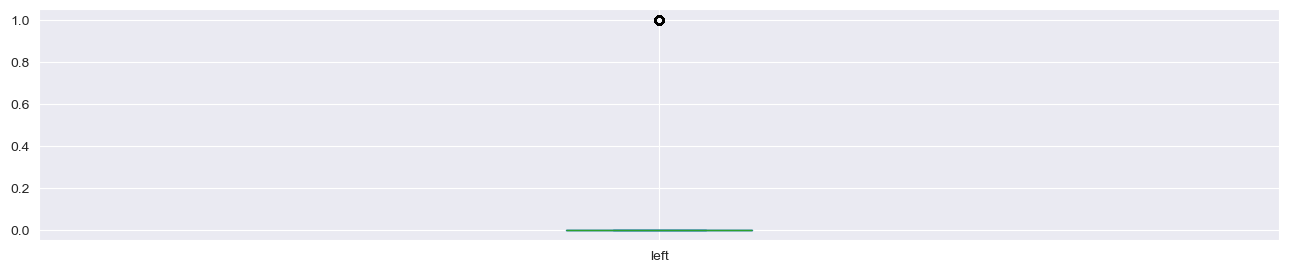

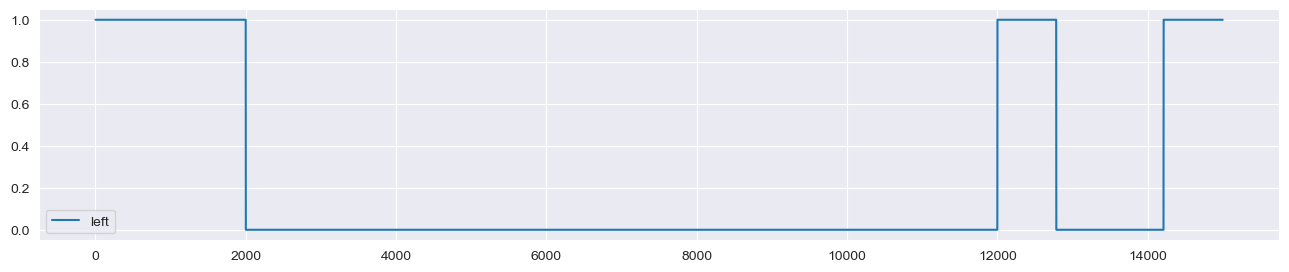

In [84]:
# filtered to only show ['left'] for clearer visual
left_df = updated_df.drop(columns=(['satisfaction_level', 'number_project', 
                                    'time_spend_company', 'average_monthly_hours']))
left_df.plot(kind='box')

left_df.plot(kind='line')

In [ ]:
Part 2 - Visualize the left vs retained results based on >=5 and <=5 years employed

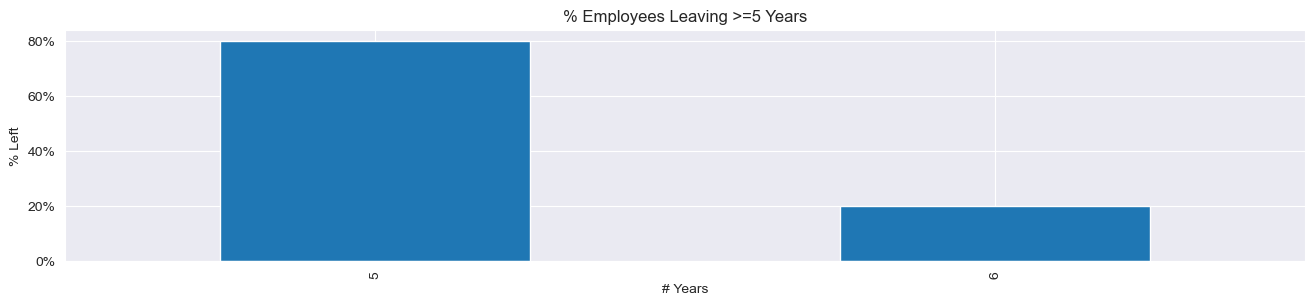

In [43]:
# 1 = True/Left & >=5 years
import matplotlib.ticker as mtick
over_5_left_df = updated_df[(updated_df['time_spend_company']>=5) & (updated_df['left']==1)]
over_5_left_df.set_index('time_spend_company')
over_5_left_df['time_spend_company'].value_counts(normalize=True).plot(kind='bar')
plt.title('% Employees Leaving >=5 Years')
plt.xlabel('# Years')
plt.ylabel('% Left')
plt. gca().yaxis. set_major_formatter(mtick. PercentFormatter(xmax=1)) #100% scale

In [44]:
# confirm results above
over_5_left_df['time_spend_company'].value_counts(normalize=True)

time_spend_company
5    0.799424
6    0.200576
Name: proportion, dtype: float64

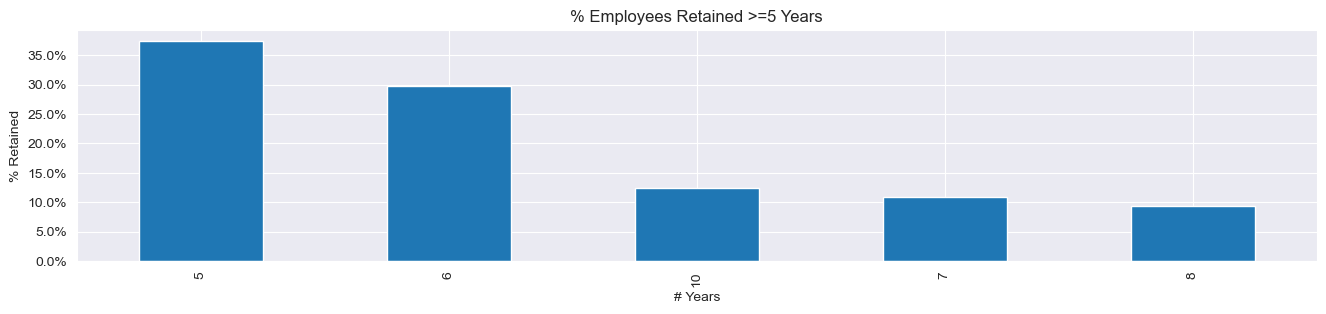

In [45]:
# 0 = False/Retained & >=5 years
over_5_retained_df = updated_df[(updated_df['time_spend_company']>=5) & (updated_df['left']==0)]
over_5_retained_df.set_index('time_spend_company')
over_5_retained_df['time_spend_company'].value_counts(normalize=True).plot(kind='bar')
plt.title('% Employees Retained >=5 Years')
plt.xlabel('# Years')
plt.ylabel('% Retained')
plt. gca().yaxis. set_major_formatter(mtick. PercentFormatter(xmax=1))

In [46]:
# confirm results above
over_5_retained_df['time_spend_company'].value_counts(normalize=True)

time_spend_company
5     0.373614
6     0.297140
10    0.124927
7     0.109749
8     0.094571
Name: proportion, dtype: float64

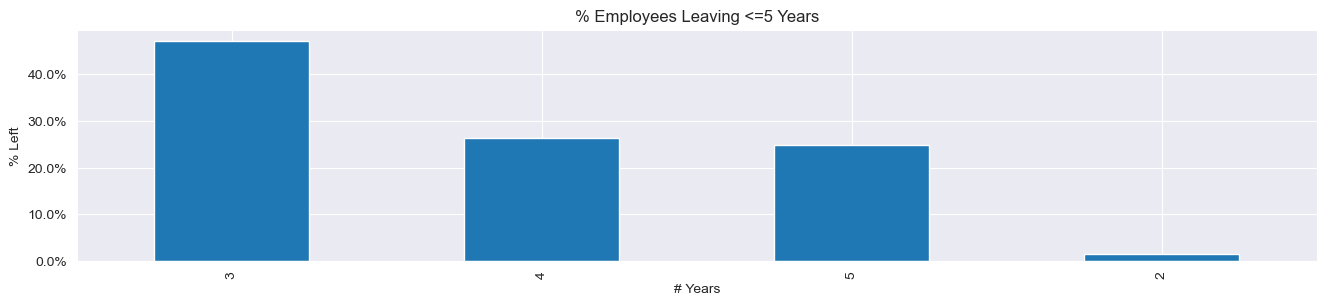

In [47]:
# 1 = True/Left & <=5 years
under_5_left_df = updated_df[(updated_df['time_spend_company']<=5) & (updated_df['left']==1)]
under_5_left_df.set_index('time_spend_company')
under_5_left_df['time_spend_company'].value_counts(normalize=True).plot(kind='bar')
plt.title('% Employees Leaving <=5 Years')
plt.xlabel('# Years')
plt.ylabel('% Left')
plt. gca().yaxis. set_major_formatter(mtick. PercentFormatter(xmax=1))

In [48]:
# confirm results above
under_5_left_df['time_spend_company'].value_counts(normalize=True)

time_spend_company
3    0.471743
4    0.264723
5    0.247769
2    0.015764
Name: proportion, dtype: float64

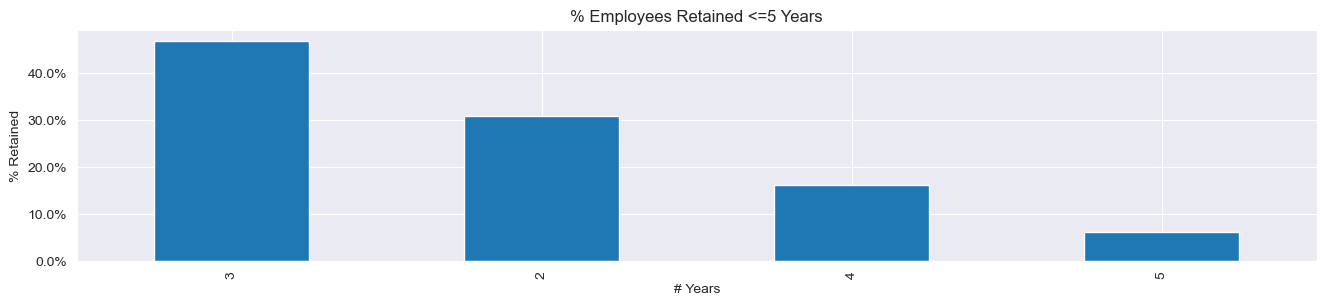

In [49]:
# 0 = False/Retained & <=5 years
under_5_retained_df = updated_df[(updated_df['time_spend_company']<=5) & (updated_df['left']==0)]
under_5_retained_df.set_index('time_spend_company')
under_5_retained_df['time_spend_company'].value_counts(normalize=True).plot(kind='bar')
plt.title('% Employees Retained <=5 Years')
plt.xlabel('# Years')
plt.ylabel('% Retained')
plt. gca().yaxis. set_major_formatter(mtick. PercentFormatter(xmax=1))

In [50]:
# confirm results above
under_5_retained_df['time_spend_company'].value_counts(normalize=True)

time_spend_company
3    0.469049
2    0.308160
4    0.160985
5    0.061806
Name: proportion, dtype: float64

In [ ]:
Part 3 - Examine correlations of columns ['satisfaction_levels', 'number_project, 
                                                'average_monthly_hours']

In [53]:
# >=5 years left
over_5_left_df[['satisfaction_level', 'number_project', 
                'average_monthly_hours']].mean().reset_index()

,index,0
0,satisfaction_level,0.729511
1,number_project,4.722649
2,average_monthly_hours,245.516315


In [54]:
# >=5 years retained
over_5_retained_df[['satisfaction_level', 'number_project', 
                    'average_monthly_hours']].mean().reset_index()

,index,0
0,satisfaction_level,0.548535
1,number_project,4.019264
2,average_monthly_hours,196.522475


In [55]:
# <=5 years left
under_5_left_df[['satisfaction_level', 'number_project', 
                 'average_monthly_hours']].mean().reset_index()

,index,0
0,satisfaction_level,0.418272
1,number_project,3.810827
2,average_monthly_hours,205.254313


In [56]:
# <=5 years retained
under_5_retained_df[['satisfaction_level', 'number_project', 
                     'average_monthly_hours']].mean().reset_index()

,index,0
0,satisfaction_level,0.674539
1,number_project,3.774119
2,average_monthly_hours,199.079285


In [ ]:
Part 4 - Visualize the correlations with same variables grouped by ['Department'] 
1st bar graph - average of variables: 'satisfaction_level', 'number_project', 
                                      'average_monthly_hours' grouped by 'department'
2nd line graph - variables over time

Text(0, 0.5, 'satisfaction_level')

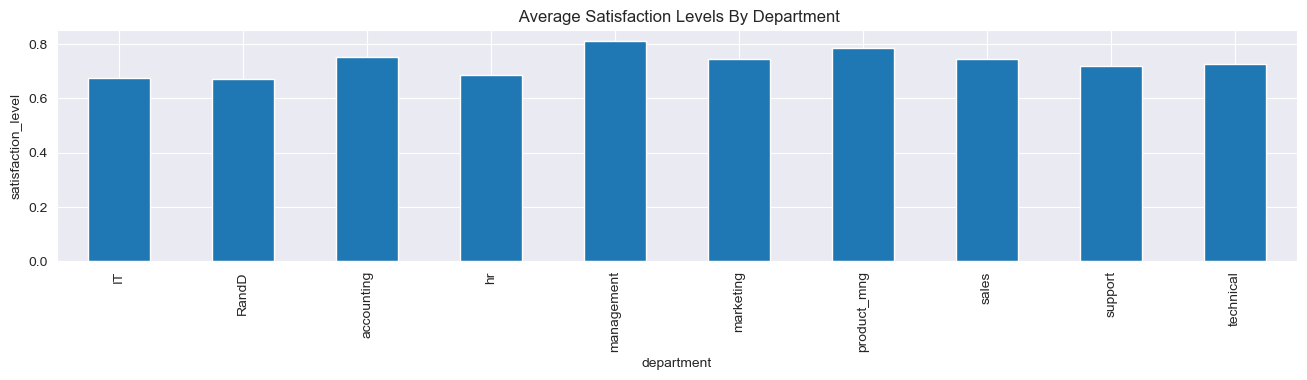

In [57]:
# filtered: >=5 years left by department 
over_5_left_df.groupby('department')['satisfaction_level'].mean().plot(kind='bar')
plt.title(" Average Satisfaction Levels By Department")
plt.ylabel('satisfaction_level')

Text(0.5, 1.0, 'Trend Over Time Satisfaction Levels')

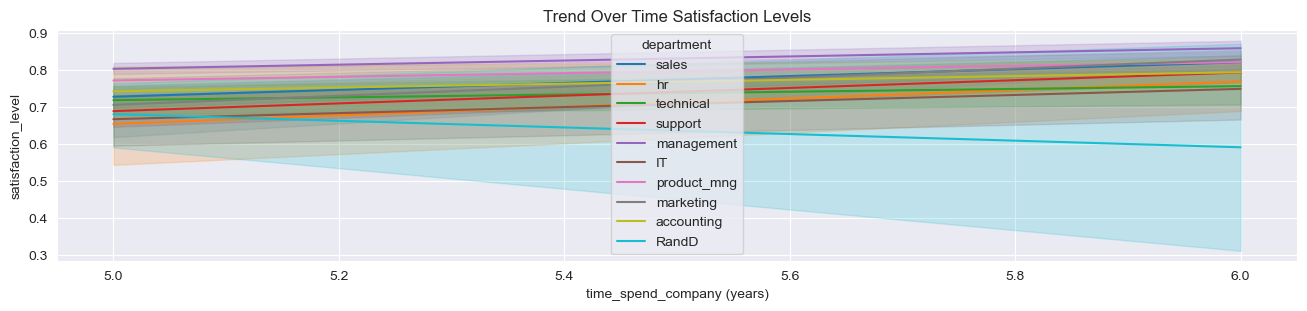

In [58]:
# filtered: >=5 years left by department 
sns.lineplot(x='time_spend_company',y='satisfaction_level', hue='department', data=over_5_left_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Satisfaction Levels')

Text(0, 0.5, 'number_project')

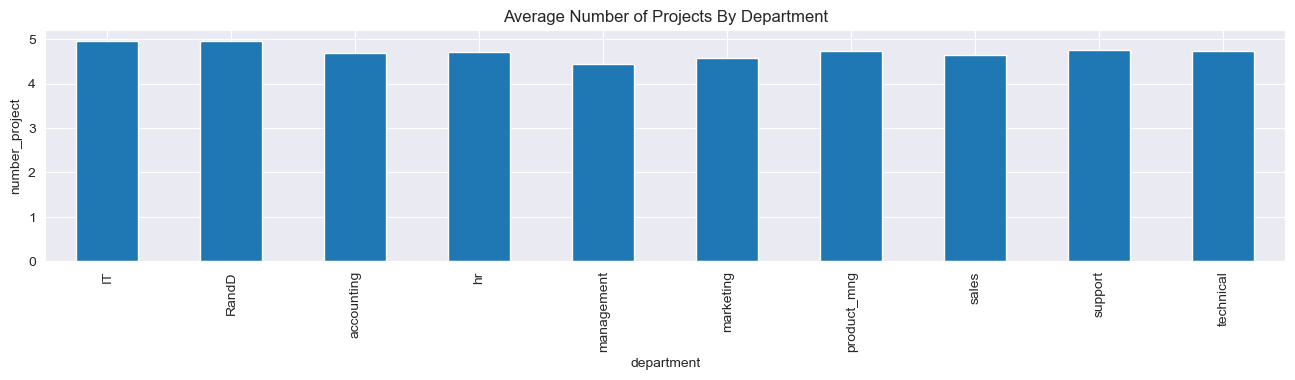

In [59]:
# filtered: >=5 years left by department
over_5_left_df.groupby('department')['number_project'].mean().plot(kind='bar')
plt.title("Average Number of Projects By Department")
plt.ylabel('number_project')

Text(0.5, 1.0, 'Trend Over Time Average Number of Projects')

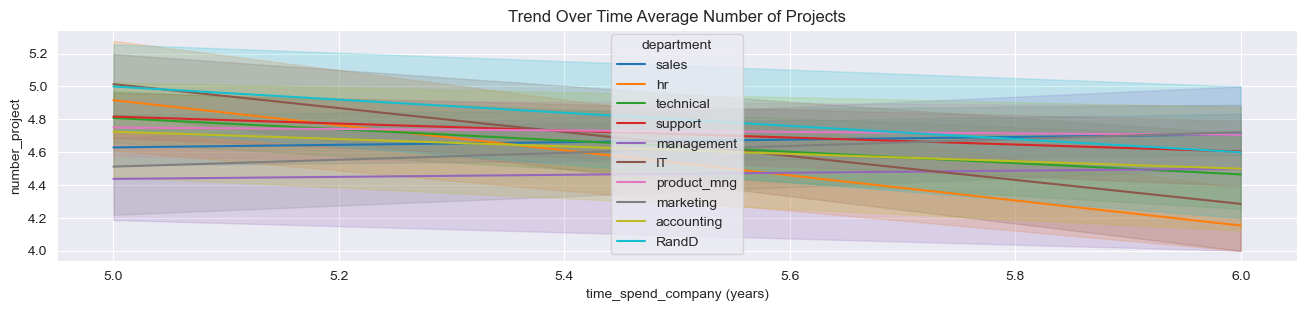

In [60]:
# filtered: >=5 years left by department
sns.lineplot(x='time_spend_company',y='number_project', hue='department', data=over_5_left_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Number of Projects')

Text(0, 0.5, 'average_monthly_hours')

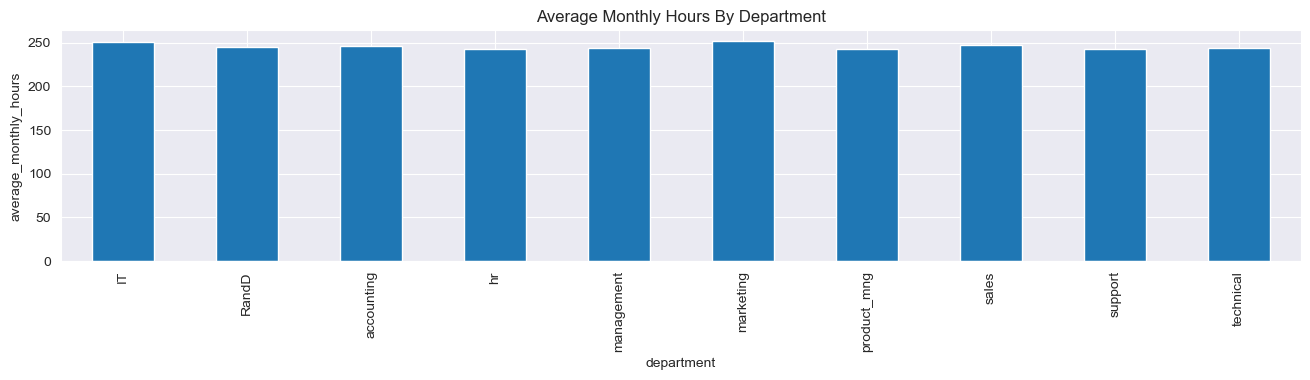

In [61]:
# >=5 years left by department
over_5_left_df.groupby('department')['average_monthly_hours'].mean().plot(kind='bar')
plt.title("Average Monthly Hours By Department")
plt.ylabel('average_monthly_hours')

Text(0.5, 1.0, 'Trend Over Time Average Monthly Hours')

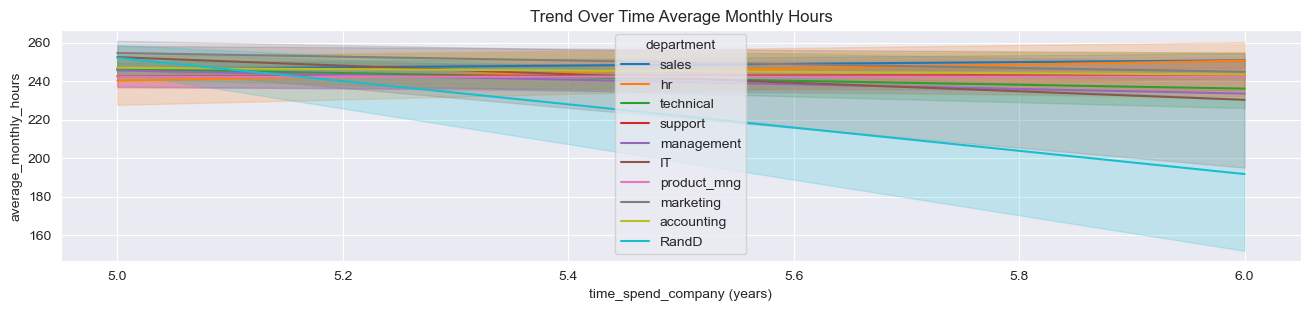

In [62]:
# >=5 years left by department
sns.lineplot(x='time_spend_company',y='average_monthly_hours', hue='department', data=over_5_left_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Monthly Hours')

Text(0, 0.5, 'satisfaction_level')

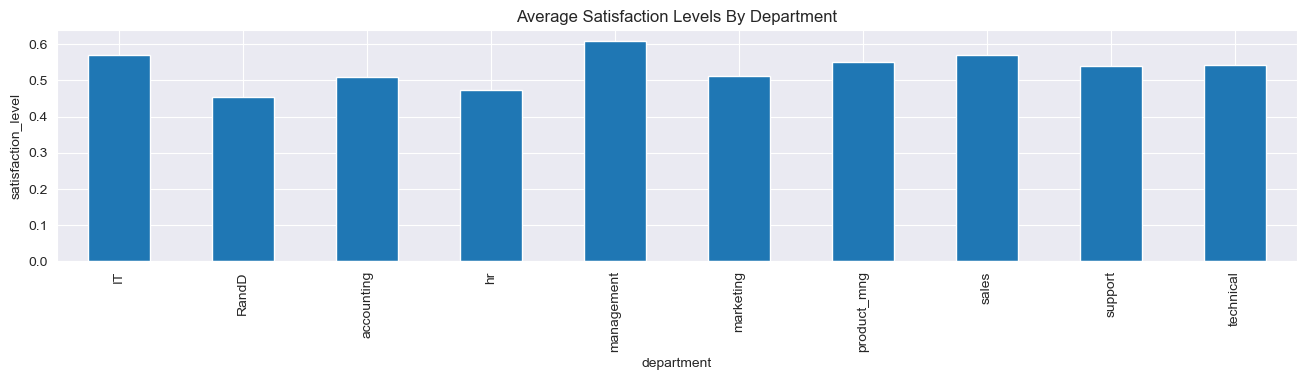

In [63]:
# >=5 years retained by department
over_5_retained_df.groupby('department')['satisfaction_level'].mean().plot(kind='bar')
plt.title("Average Satisfaction Levels By Department")
plt.ylabel('satisfaction_level')

Text(0.5, 1.0, 'Trend Over Time Average Satisfaction Levels')

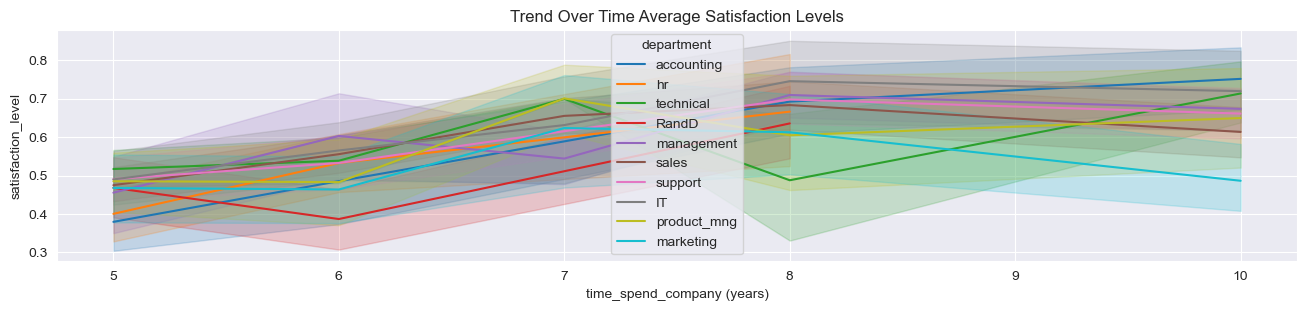

In [64]:
# >=5 years retained by department
sns.lineplot(x='time_spend_company',y='satisfaction_level', hue='department', data=over_5_retained_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Satisfaction Levels')

Text(0, 0.5, 'number_project')

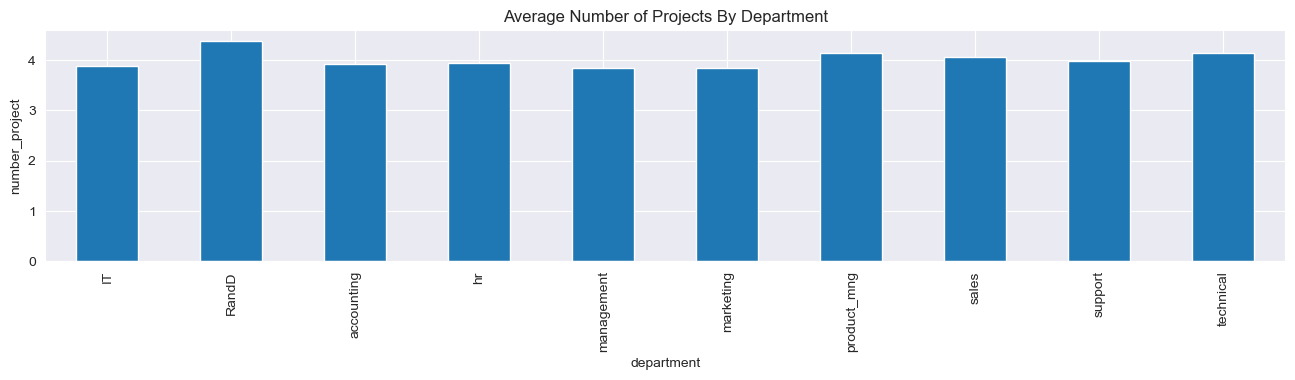

In [65]:
# >=5 years retained by department
over_5_retained_df.groupby('department')['number_project'].mean().plot(kind='bar')
plt.title('Average Number of Projects By Department')
plt.ylabel('number_project')

Text(0.5, 1.0, 'Trend Over Time Average Number of Projects')

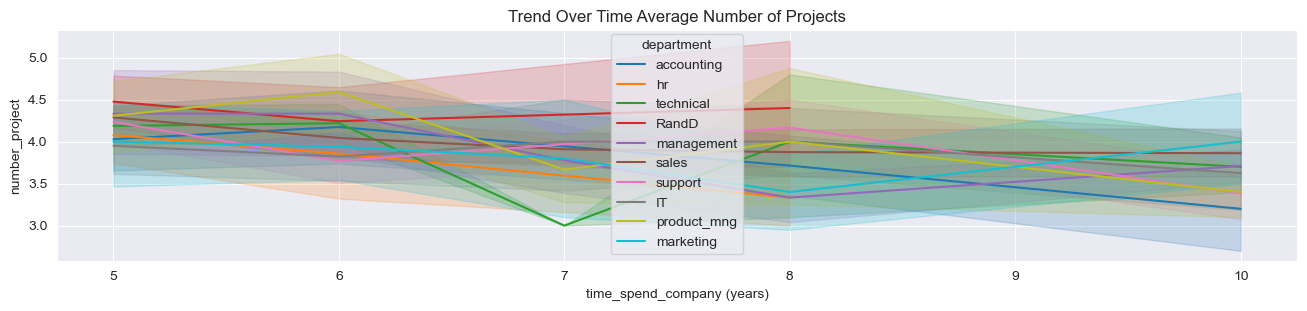

In [66]:
# >=5 years retained by department
sns.lineplot(x='time_spend_company',y='number_project', hue='department', data=over_5_retained_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Number of Projects')

Text(0, 0.5, 'average_monthly_hours')

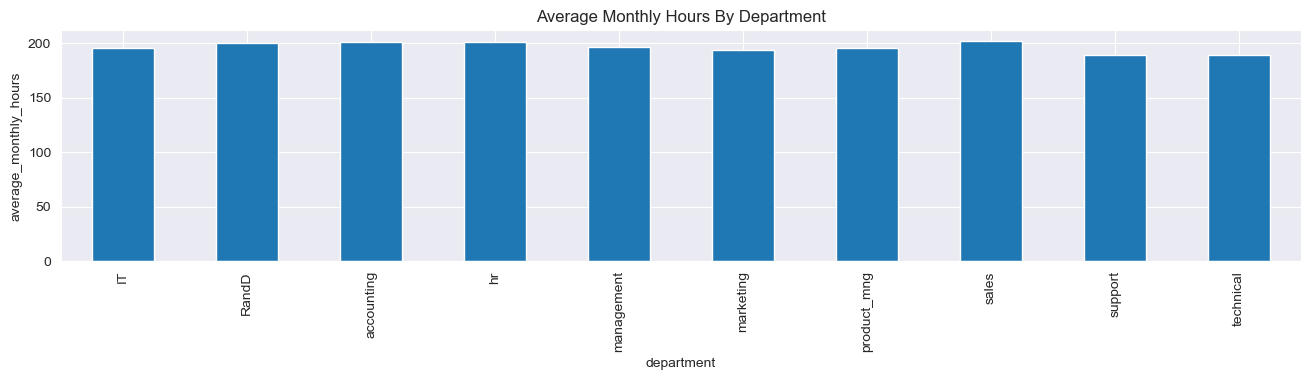

In [67]:
# >=5 years retained by department
over_5_retained_df.groupby('department')['average_monthly_hours'].mean().plot(kind='bar')
plt.title("Average Monthly Hours By Department")
plt.ylabel('average_monthly_hours')

Text(0.5, 1.0, 'Trend Over Time Average Monthly Hours')

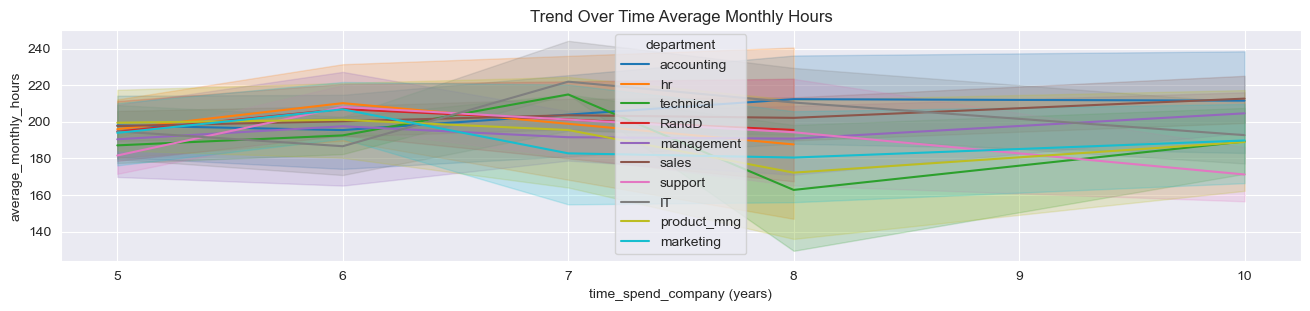

In [68]:
# >=5 years retained by department
sns.lineplot(x='time_spend_company',y='average_monthly_hours', hue='department', data=over_5_retained_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Monthly Hours')

Text(0, 0.5, 'satisfaction_level')

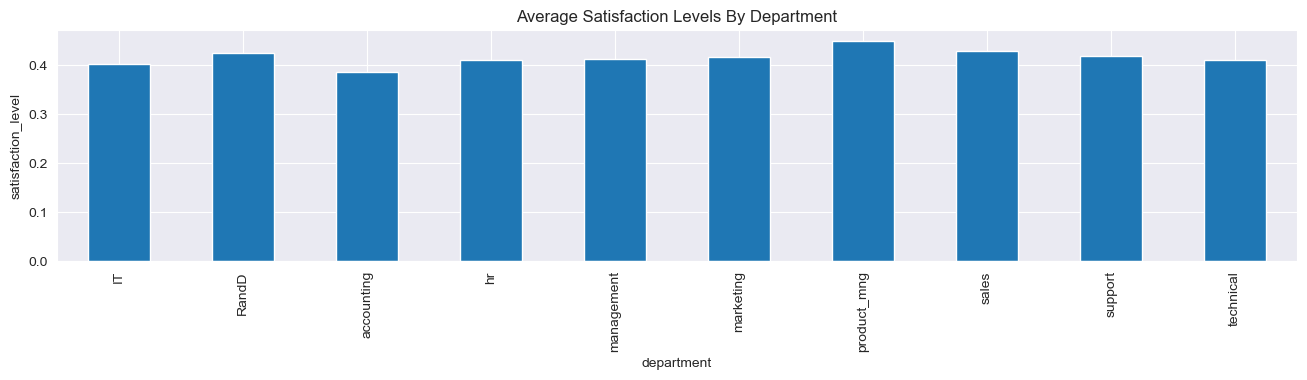

In [69]:
# <=5 years left by department
under_5_left_df.groupby('department')['satisfaction_level'].mean().plot(kind='bar')
plt.title("Average Satisfaction Levels By Department")
plt.ylabel('satisfaction_level')

Text(0.5, 1.0, 'Trend Over Time Average Satisfaction Levels')

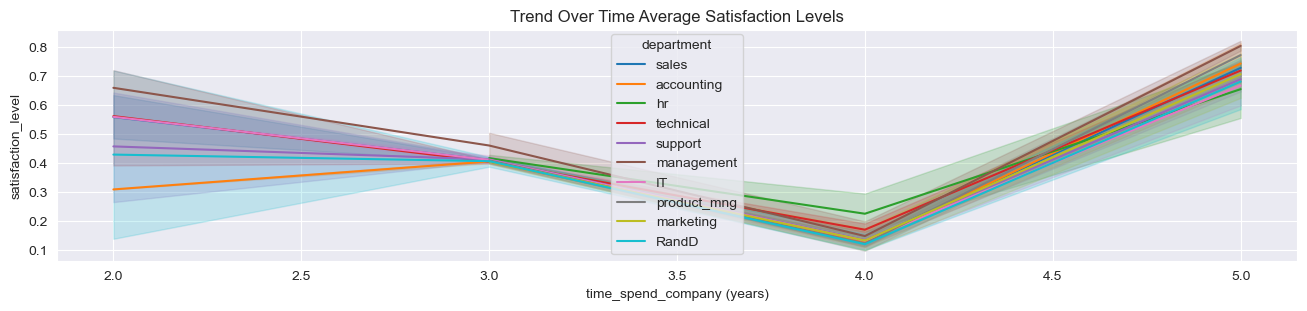

In [70]:
# <=5 years left by department
sns.lineplot(x='time_spend_company',y='satisfaction_level', hue='department', data=under_5_left_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Satisfaction Levels')

Text(0, 0.5, 'number_project')

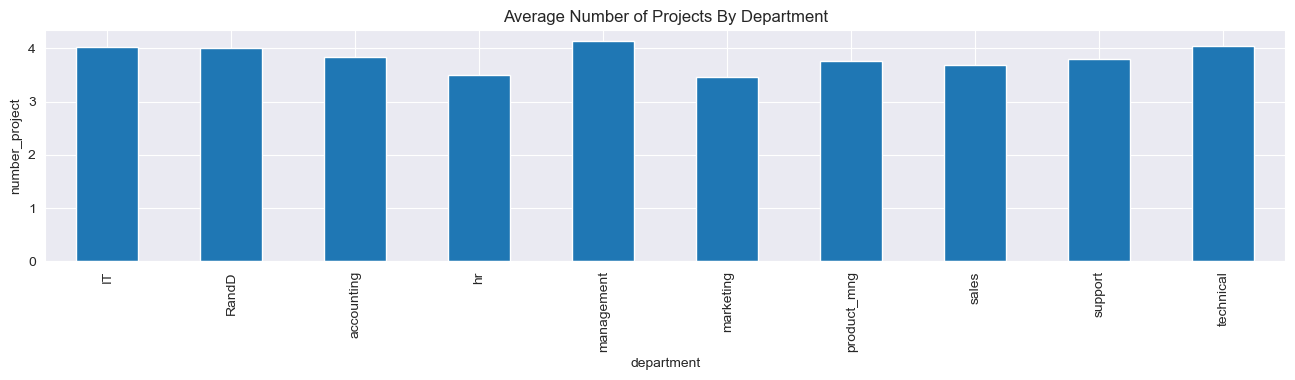

In [71]:
# <=5 years left by department
under_5_left_df.groupby('department')['number_project'].mean().plot(kind='bar')
plt.title("Average Number of Projects By Department")
plt.ylabel('number_project')

Text(0.5, 1.0, 'Trend Over Time Average Number of Projects')

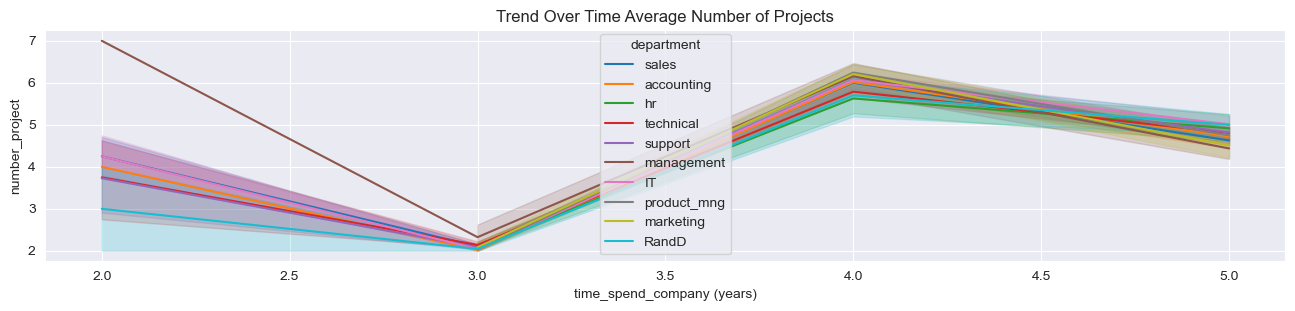

In [72]:
# <=5 years left by department
sns.lineplot(x='time_spend_company',y='number_project', hue='department', data=under_5_left_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Number of Projects')

Text(0, 0.5, 'average_monthly_hours')

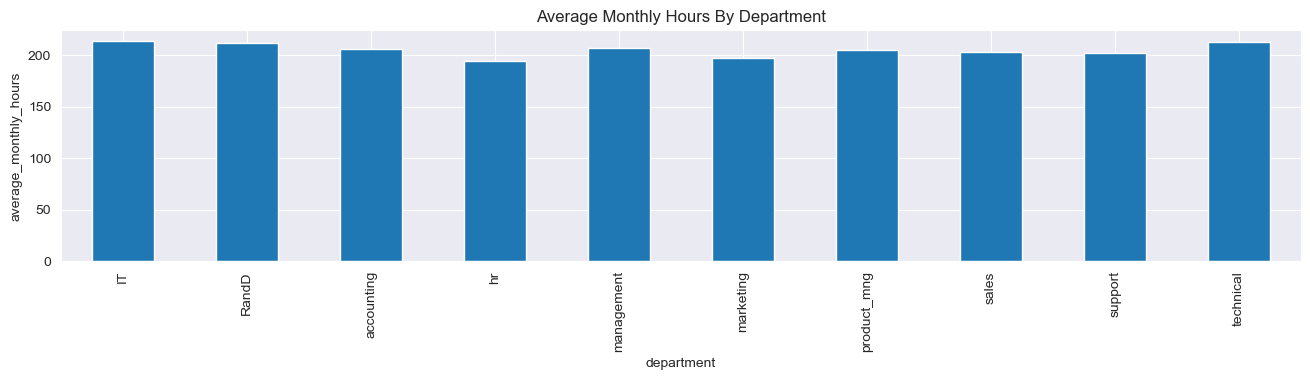

In [73]:
# <=5 years left by department
under_5_left_df.groupby('department')['average_monthly_hours'].mean().plot(kind='bar')
plt.title("Average Monthly Hours By Department")
plt.ylabel('average_monthly_hours')

Text(0.5, 1.0, 'Trend Over Time Average Monthly Hours')

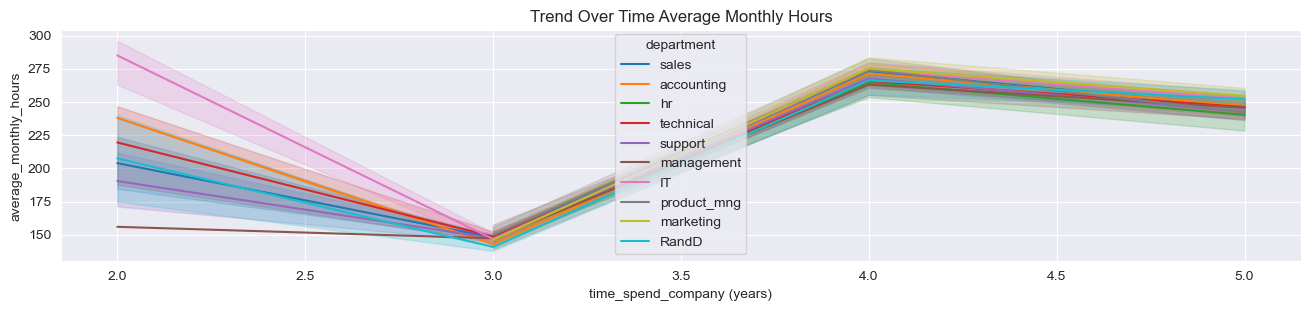

In [74]:
# <=5 years left by department
sns.lineplot(x='time_spend_company',y='average_monthly_hours', hue='department', data=under_5_left_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Monthly Hours')

Text(0, 0.5, 'satisfaction_level')

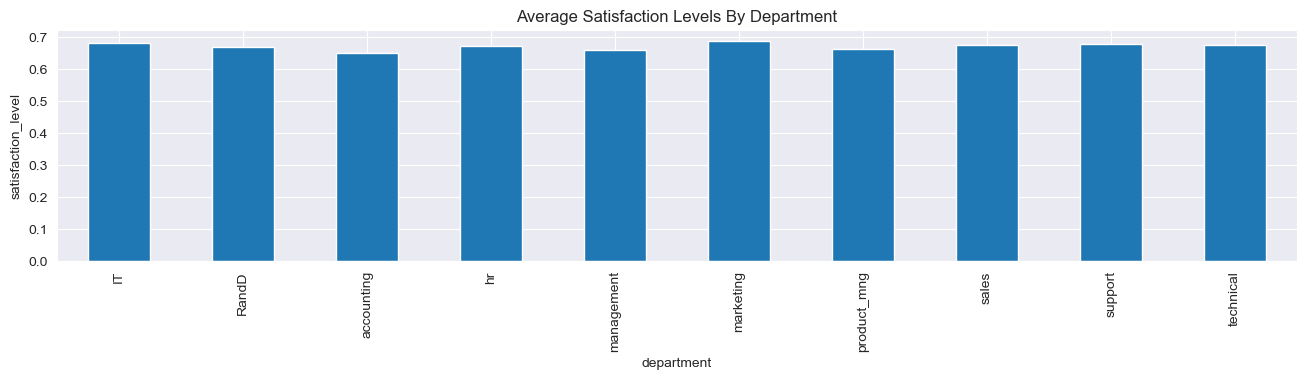

In [75]:
# <=5 years retained by department
under_5_retained_df.groupby('department')['satisfaction_level'].mean().plot(kind='bar')
plt.title("Average Satisfaction Levels By Department")
plt.ylabel('satisfaction_level')

Text(0.5, 1.0, 'Trend Over Time Satisfaction Levels')

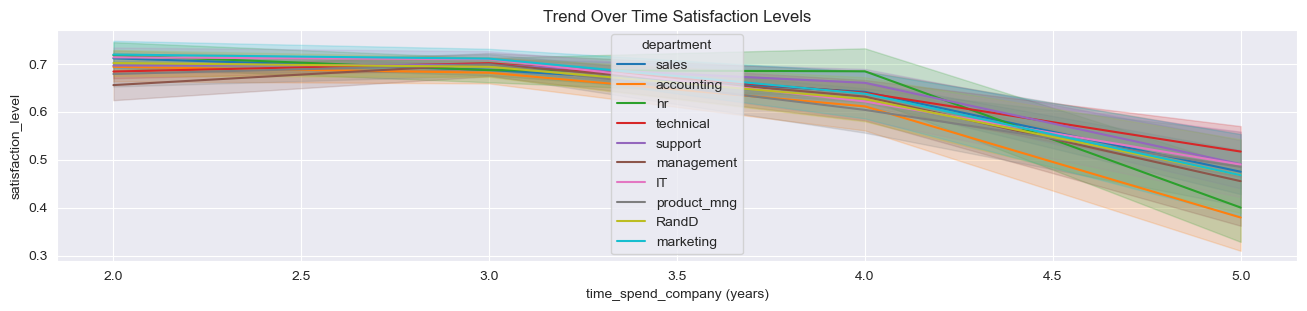

In [76]:
# <=5 years retained by department
sns.lineplot(x='time_spend_company',y='satisfaction_level', hue='department', data=under_5_retained_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Satisfaction Levels')

Text(0, 0.5, 'number_project')

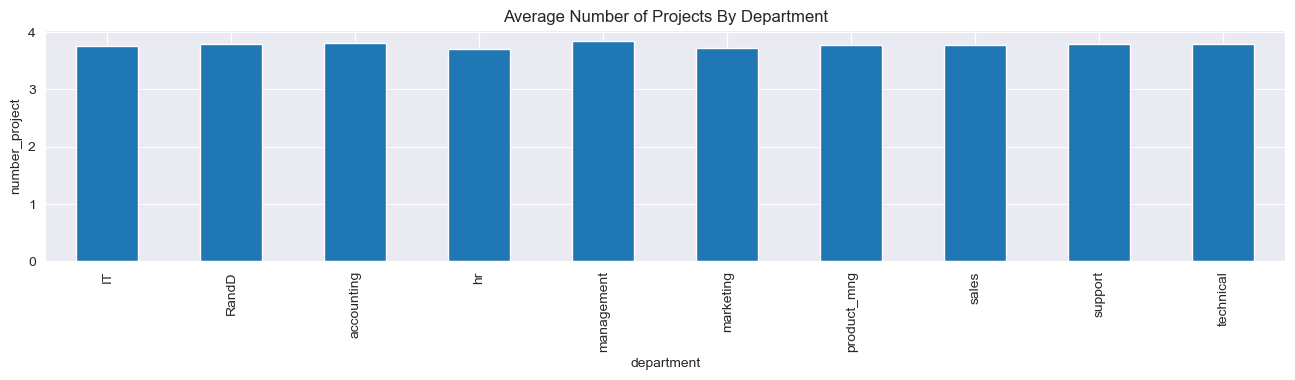

In [77]:
# <=5 years retained by department
under_5_retained_df.groupby('department')['number_project'].mean().plot(kind='bar')
plt.title("Average Number of Projects By Department")
plt.ylabel('number_project')

Text(0.5, 1.0, 'Trend Over Time Average Number of Projects')

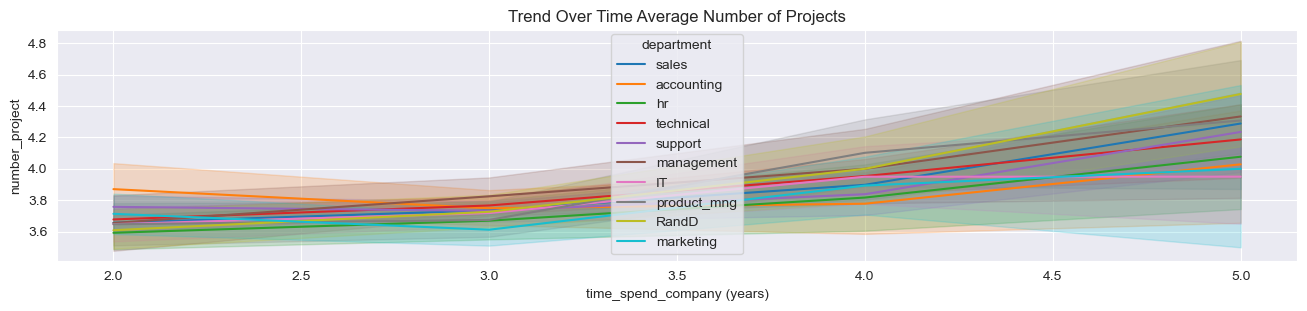

In [78]:
# <=5 years retained by department
sns.lineplot(x='time_spend_company',y='number_project', hue='department', data=under_5_retained_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Number of Projects')

Text(0, 0.5, 'average_monthly_hours')

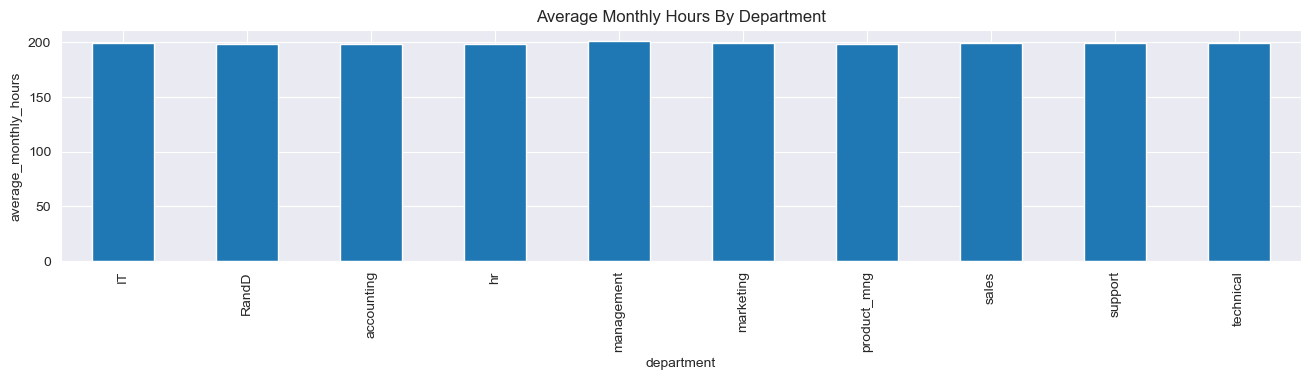

In [79]:
# <=5 years retained by department
under_5_retained_df.groupby('department')['average_monthly_hours'].mean().plot(kind='bar')
plt.title("Average Monthly Hours By Department")
plt.ylabel('average_monthly_hours')

Text(0.5, 1.0, 'Trend Over Time Average Monthly Hours')

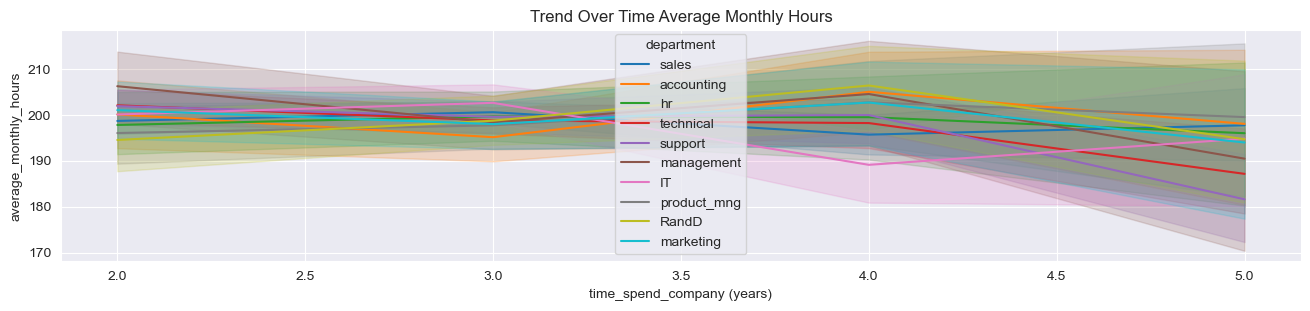

In [80]:
# <=5 years retained by department
sns.lineplot(x='time_spend_company',y='average_monthly_hours', hue='department', data=under_5_retained_df)
plt.xlabel('time_spend_company (years)')
plt.title('Trend Over Time Average Monthly Hours')

In [ ]:
Part 1 Summary: Brief Overview
    
* 3571(24%) left / 11428(76%) retained when years employed was >=5
* 3 years (43%) / 8 years (10%) were the highest/lowest time spend with the company
* 4 projects (29%) / 7 projects (2%) were the highest / lowest amount of projects completed
* 135 & 156 hours / 303 hours were the highset / lowest average of monthly hours worked
* Sales(28%) / management(4%) were the most / least employees per department

In [ ]:
Part 2 Summary: Time spent with the company results
    
Where years employed >=5
* left the company: 80% at 5 years, 20 % at 6 years
* retained: 37% at 5 years, 30% at 6 years, 12% at 10 years, 11% at 7 years, 9% at 8 years
    
Where years employed <=5
* left the company: 47% at 3 years, 26% at 4 years, 25% at 5 years, 2% at 2 years
* retained: 47% at 3 years, 31% at 2 years, 16% at 4 years, 1% at 5 years

In [ ]:
Part 3 Summary: Correlation results amongst 'satisfaction_level', 'number_project', 
    'average_monthly_hours'
    
* Where years >=5 & left averages:
'satisfaction_level'= .73, 'number_project'= 4.7, 'average_monthly_hours'= 245

*Where years >=5 & retained averages:
'satisfaction_level'= .55, 'number_project'= 4, 'average_monthly_hours'= 197

* Where years <=5 & left averages:
'satisfaction_level'= .41, 'number_project'= 3.8, 'average_monthly_hours'= 205

* Where years <=5 & retained averages:
    'satisfaction_level'= .67, 'number_project'= 3.8, 'average_monthly_hours'= 199
    
* Employees who eventually left the company averaged the highest satisfaction levels, 
projects completed, and average hours worked monthly
* We can assume other factors such as better oppertunity arose for the most productive 
and most satisfied employeed to eventually depart


In [ ]:
Part 4 Summary: Potential correlation amongst departments of 'satisfaction_level', 
    'number_project', 'average_monthly_hours' 
* Where years >=5 & left
Highest 'satisfaction_level' = management & product_mng  
Lowest 'satisfaction_level' = IT, RandD, hr
Highest 'number_project' = IT & RandD
Lowest 'number_project' = management
Highest 'average_monthly_hours' = IT & marketing
Lowest 'average_monthly_hours' = hr, product_mng, support
* Where years >=5 & retained
Highest 'satisfaction_level' = IT, management, sales
Lowest 'satisfaction_level' = RandD, hr
Highest 'number_project' = RandD, product_mng, sales, technical
Lowest 'number_project' = IT, management, marketing
Highest 'average_monthly_hours' = RandD, accounting, hr, sales
Lowest 'average_monthly_hours' = marketing, support
* Where years <=5 & left
Highest 'satisfaction_level' = RandD, product_mng, support
Lowest 'satisfaction_level' = accounting
Highest 'number_project' = management, technical
Lowest 'number_project' = hr, marketing
Highest 'average_monthly_hours' = IT, RandD, management, technical
Lowest 'average_monthly_hours' = hr, marketing
* Where years <=5 & retained
Highest 'satisfaction_level' = IT, marketing, support, technical
Lowest 'satisfaction_level' = accounting
Highest 'number_project' = management
Lowest 'number_project' = hr
Highest 'average_monthly_hours' = almost no difference
Lowest 'average_monthly_hours' = almost no difference    
* There is no distinct correlation amongst departments regarding the variables 'satisfaction_level', 'number_project', 'average_monthly_hours'   